# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [4]:
estimate = medical.charges.mean()
sd = medical.charges.std()  # Pandas standard deviation defaults to the unbiased estimator, i.e., ddof=1
print(f"The mean of charges is ${estimate:.2f}, and the standard deviation is ${sd:.2f}")

The mean of charges is $13270.42, and the standard deviation is $12110.01


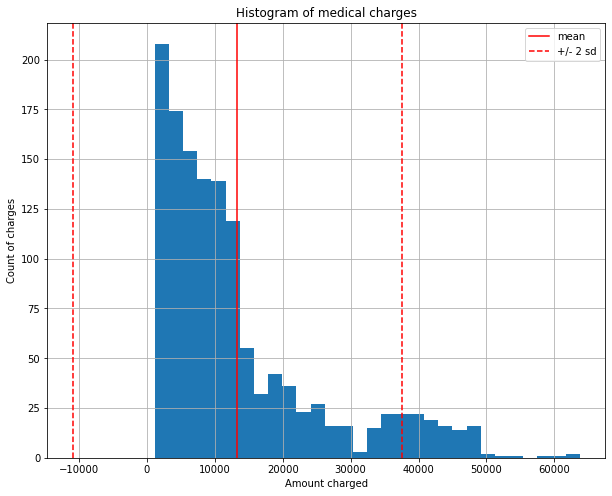

In [5]:
medical.charges.hist(figsize=(10, 8), bins='auto')
plt.axvline(estimate, color='r', label='mean')
plt.title('Histogram of medical charges')
plt.ylabel('Count of charges')
plt.xlabel('Amount charged')
plt.axvline(estimate + 2*sd, color='r', linestyle='--', label='+/- 2 sd')
plt.axvline(estimate - 2*sd, color='r', linestyle='--')
plt.legend();

This histogram shows clearly that the mean and standard deviation are misleading at best as summaries of the medical charges because the distribution of medical charges is highly right-skewed.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ This is a large sample (n=1338), and by the central limit theorem, the distribution of sample means is normally distributed, allowing us to quantify our uncertainty due to random (sampling) error by treating the sample mean as belonging to a normal distribution with sd = (standard deviation of our sample) / sqrt(n). Although this technically calls for a t test (since we do not know the population variance), the z-statistic and the t-statistic will be about the same, because we have 1337 degrees of freedom in our estimate. In other words, the t-distribution with dof=1337 is approximately normal.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ In this case, the administrator is concerned about the average charge falling below \\$12,000, so our null hypothesis is that the average charge is at or above \\$12,000, necessitating a one-sided t-test.

In [6]:
h_null = 12000
n = medical.charges.count()
se = medical.charges.std() / np.sqrt(n)
t_score = (estimate - h_null) / se
p = t.cdf(-t_score, n-1)
conf_95 = np.round(estimate + t.ppf([0.025, 0.975], n-1) * se, 2)

In [7]:
print(f"""One-tailed t-test:
The estimate of the mean is {estimate:.2f}, with a standard error of {se:.2f}.
The test statistic is {t_score:.2f}.
The one-tailed p-value for this test statistic is {p:.2e}.
The 95% confidence interval for the estimate is {conf_95}.
""")

One-tailed t-test:
The estimate of the mean is 13270.42, with a standard error of 331.07.
The test statistic is 3.84.
The one-tailed p-value for this test statistic is 6.51e-05.
The 95% confidence interval for the estimate is [12620.95 13919.89].



With 95% confidence, we estimate that the average charge is \\$13,270, with a 95% confidence interval from \\$12,558 –\\$13982. Assuming that this sample is representative, we are highly confident that the average charge is not falling below \\$12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  The null hypothesis is that mean charge for people with insurance is the same as the mean charage as people without insurance; the alternative hypothesis is that these two population means differ. In using a t-test, we are assuming homogeneity of variance between the two groups.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [8]:
ins = medical[medical.insuranceclaim == 1].charges
noins = medical[medical.insuranceclaim == 0].charges
y_bar_ins = ins.mean()
y_bar_noins = noins.mean()
theta_hat = y_bar_ins - y_bar_noins
n_ins = ins.count()
n_noins = noins.count()
sd_theta = np.sqrt(( (n_ins - 1) * ins.var() + (n_noins - 1) * noins.var() ) / (n_ins + n_noins - 2))
se_theta = (sd_theta) * np.sqrt(1/n_ins + 1/n_noins)
t_score = np.abs(theta_hat) / se_theta
p_value = 2 * t.cdf(-t_score, n_ins + n_noins - 2)

In [9]:
print(f"My manually calculated test statistic is {t_score} and p-value is {p_value}")

My manually calculated test statistic is 11.89329903087671 and p-value is 4.461230231620972e-31


In [10]:
from scipy.stats import ttest_ind

ttest_ind(ins, noins)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  Scipy doesn't provide an equivalent function for a z-test from a sample; the results from an equivalent z-test will approach the results from the t-test as the sample sizes approach infinity. The t distribution accomodates the sampling uncertainty with fatter tails than the normal distribution for low degrees of freedom.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test